# 最尤推定法～単純化した例

平均$\mu$、標準偏差$\sigma$の正規分布に従ってデータが散らばるものと仮定して、$\mu$と$\sigma$の値を最尤推定法で推定する。

## 正規分布のパラメトリックモデル

ある特定のデータ$t=t_n$が得られる確率は次式で与えられる

$$
N(t \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{- \frac{1}{2 \sigma^2}(t_n - \mu)^2} \tag{3.23}
$$

全ての観測値$\left\{ t_n \right\}_{n=1}^N$についてまとめて考えると、一連のデータ群が得られる確率$P$は、それぞれの確率の積となり

$$
\begin{align*}
P &= N(t_1 \mid \mu, \sigma^2) \times \cdots \times N(t_N \mid \mu, \sigma^2) \\
  &= \prod_{n=1}^N (t_n \mid \mu, \sigma^2) \tag{3.24}
\end{align*}
$$

以上は$\mu$と$\sigma$を変数とする尤度関数$P$を表す。$P$を最大にする$\mu$と$\sigma$を求める。

まず、(3.23)を(3.24)に代入して

$$
\begin{align*}
P &= \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e} ^ {- \frac{1}{2 \sigma^2}(t_n - \mu)^2} \\
  &= (\frac{1}{2 \pi \sigma^2}) ^ {\frac{N}{2}} \exp {\left\{ - \frac{1}{2 \sigma^2} \sum_{n=1}^N (t_n - \mu)^2 \right\}} \tag{3.25}
\end{align*}
$$

(3.25)には$\sigma$が$1/\sigma^2$という形のみで含まれているため、

$$
\beta = \frac{1}{\sigma^2} \tag{3.26}
$$

とおく、(3.25)は

$$
P = (\frac{\beta}{2 \pi}) ^ {\frac{N}{2}} \exp{\left\{ - \frac{\beta}{2} \sum_{n=1}^N (t_n - \mu)^2 \right\}}
$$

さらに両辺の対数をとって

$$
\ln{P} = \frac{N}{2} \ln{\beta} - \frac{N}{2} \ln{2 \pi} - \frac{\beta}{2} \sum_{n=1}^N (t_n - \mu)^2 \tag{3.27}
$$

上記は対数尤度関数という。対数は単調増加関数なので、$\ln{P}$が最大になることと$P$が最大になることは同値。対数尤度関数を最大にする$(\mu, \beta)$は、以下条件で決まる。

$$
\frac{\partial(\ln{P})}{\partial \mu} = 0 \tag{3.28}
$$

$$
\frac{\partial(\ln{P})}{\partial \beta} = 0 \tag{3.29}
$$

まず、(3.28)に(3.27)を代入して

$$
\frac{(\partial(\ln{P})}{\partial \mu} = - \frac{\beta}{2} \cdot 2\left\{ \sum_{n=1}^N(t_n - \mu) \right\} \cdot (-1) = \beta \sum_{n=1}^N(t_n - \mu) = \beta (\sum_{n=1}^N t_n - N\mu) = 0
$$

以上から$\mu$は

$$
\mu = \frac{1}{N} \sum_{n=1}^N t_n \tag{3.31}
$$

上式の右辺は観測データ$\left\{ t_n \right\}_{n=1}^N$の標本平均である。つまり、データの背後にある正規分布の平均$\mu$の推定値として、観測データの標本平均を採用することを意味する。

次に、(3.29)に(3.27)を代入して

$$
\frac{\partial(\ln{P})}{\partial \beta} = \frac{N}{2} \cdot \frac{1}{\beta} - \frac{1}{2} \sum_{n=1}^N(t_n - \mu)^2 = 0
$$

以上から$\sigma^2$は

$$
\sigma^2 = \frac{1}{\beta} = \frac{2}{N} \cdot \frac{1}{2} \sum_{n=1}^N (t_n - \mu)^2 = \frac{1}{N} \sum_{n=1}^N (t_n - \mu)^2 \tag{3.33}
$$

上式の右辺は観測データ$\left\{ t_n \right\}_{n=1}^N$の標本分散である。つまり、データの背後にある正規分布の分散$\sigma^2$の推定値として、観測データの標本分散を採用することを意味する。

### サンプルデータでの確認

以下では、平均$0$、標準偏差$1$の正規分布に従って、ランダムな観測値$\left\{ t_n \right\}_{n=1}^N$を生成し、その後式(3.31)と(3.33)を用いて、平均$\mu$と標準偏差$\sigma$の推定値を計算している。また最後に、正解となる「平均$0$、標準偏差$1$」の正規分布のグラフと、推定された「平均$\mu$と標準偏差$\sigma$」の正規分布のグラフを描画している。

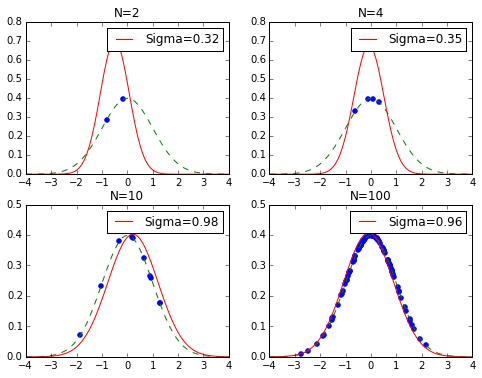

In [5]:
# 最尤推定による正規分布の推定
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal
from scipy.stats import norm

fig = plt.figure(figsize=(8, 6))

for c, datapoints in enumerate([2, 4, 10, 100]): # サンプル数
    ds = normal(loc=0, scale=1, size=datapoints)
    mu = np.mean(ds) # 平均の推定値
    sigma = np.sqrt(np.var(ds)) # 標準偏差の推定値
    
    subplot = fig.add_subplot(2, 2, c + 1)
    subplot.set_title("N=%d" % datapoints)
    
    # 真の曲線を描画
    linex = np.arange(-10, 10.1, 0.1)
    orig = norm(loc=0, scale=1)
    subplot.plot(linex, orig.pdf(linex), color='g', linestyle='--')
    
    # 推定した曲線を描画
    est = norm(loc=mu, scale=np.sqrt(sigma))
    label = "Sigma=%.2f" % sigma
    subplot.plot(linex, est.pdf(linex), color='r', label=label)
    subplot.legend(loc=1)
    
    # サンプルの表示
    subplot.scatter(ds, orig.pdf(ds), marker='o', color='b')
    subplot.set_xlim(-4, 4)
    subplot.set_ylim(0)